In [11]:
import pandas as pd
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df=pd.read_csv('C:/Users/Evang/Downloads/combined_starschema.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DealershipID       30 non-null     int64 
 1   SellerName         30 non-null     object
 2   ModelName          30 non-null     object
 3   Address            30 non-null     object
 4   ContactNumber      30 non-null     object
 5   ID                 30 non-null     int64 
 6   ManufactureName    30 non-null     object
 7   EngineType         30 non-null     object
 8   Price              30 non-null     int64 
 9   Sale_ID            30 non-null     int64 
 10  SaleDate           30 non-null     object
 11  TotalAmount        30 non-null     int64 
 12  MaterialID         30 non-null     int64 
 13  MaterialName       30 non-null     object
 14  Category           30 non-null     object
 15  Color              30 non-null     object
 16  PricePerUnit       30 non-null     int64 
 17 

In [14]:
df.describe()

,DealershipID,ID,Price,Sale_ID,TotalAmount,MaterialID,PricePerUnit,AvailableQuantity
count,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000
mean,5.500000,5.500000,29950.000000,5.500000,29900.00000,5.500000,57.800000,2950.000000
std,2.921384,2.921384,8885.623802,2.921384,9033.84441,2.921384,62.044144,2290.723421
min,1.000000,1.000000,20000.000000,1.000000,19000.00000,1.000000,9.000000,500.000000
25%,3.000000,3.000000,23000.000000,3.000000,23000.00000,3.000000,21.000000,1000.000000
50%,5.500000,5.500000,27500.000000,5.500000,27500.00000,5.500000,33.000000,2250.000000
75%,8.000000,8.000000,34500.000000,8.000000,35000.00000,8.000000,51.000000,5000.000000
max,10.000000,10.000000,50000.000000,10.000000,50000.00000,10.000000,200.000000,8000.000000


In [15]:
df.head()

,DealershipID,SellerName,ModelName,Address,ContactNumber,ID,ManufactureName,EngineType,Price,Sale_ID,SaleDate,TotalAmount,MaterialID,MaterialName,Category,Color,PricePerUnit,AvailableQuantity
0,1,Cityville Toyota,Camry,"123 Main St, Cityville, USA",111-222-3333,1,Toyota,V6,26000,1,2023-01-15,26000,1,Steel,Structural,Red,26,5000
1,2,Townsville Ford,Corolla,"456 Elm St, Townsville, USA",444-555-6666,2,Ford,4-cylinder,20000,2,2023-01-20,50000,2,Aluminum,Structural,Blue,36,2000
2,3,Tokyo Honda,Mustang,"1 Honda Rd, Tokyo, Japan",987-654-3210,3,Honda,V8,50000,3,2023-02-10,23000,3,Plastic,Interior,Silver,10,8000
3,4,Detroit Chevrolet,Explorer,"1 Chevy Blvd, Detroit, USA",111-222-3333,4,Chevrolet,V6,34500,4,2023-02-18,35000,4,Leather,Interior,White,45,1500
4,5,Wolfsburg VW,Civic,"1 VW St, Wolfsburg, Germany",777-888-9999,5,Volkswagen,4-cylinder,23000,5,2023-03-05,28000,5,Rubber,Interior,Black,30,3000


In [16]:
# Check for missing values
print(df.isnull().sum())

DealershipID         0
SellerName           0
ModelName            0
Address              0
ContactNumber        0
ID                   0
ManufactureName      0
EngineType           0
Price                0
Sale_ID              0
SaleDate             0
TotalAmount          0
MaterialID           0
MaterialName         0
Category             0
Color                0
PricePerUnit         0
AvailableQuantity    0
dtype: int64


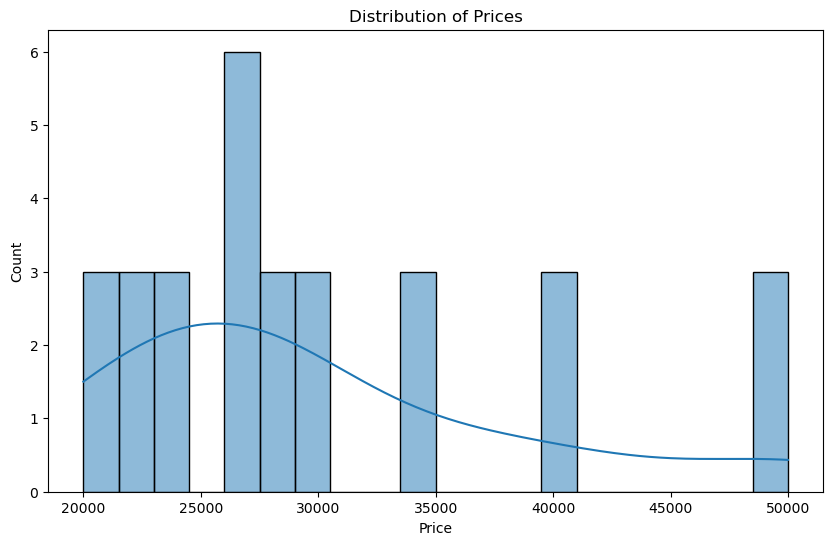

In [17]:
# Distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Prices')
plt.show()


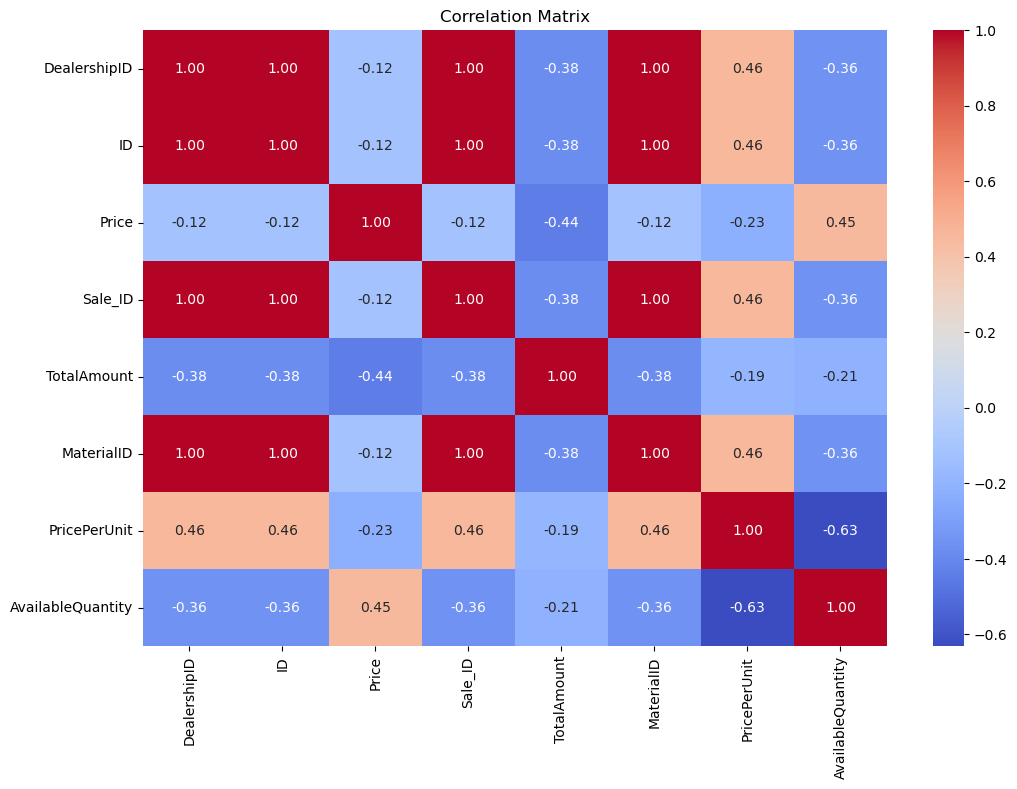

In [18]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [19]:
# Top selling models
top_models = df['ModelName'].value_counts().head(5)
print('Top Selling Models:\n', top_models)


Top Selling Models:
 Camry       3
Corolla     3
Mustang     3
Explorer    3
Civic       3
Name: ModelName, dtype: int64


In [20]:
# Average price per engine type
avg_price_per_engine_type = df.groupby('EngineType')['Price'].mean().sort_values(ascending=False)
print('Average Price per Engine Type:\n', avg_price_per_engine_type)


Average Price per Engine Type:
 EngineType
V8            45000.0
V6            28875.0
4-cylinder    23500.0
Name: Price, dtype: float64


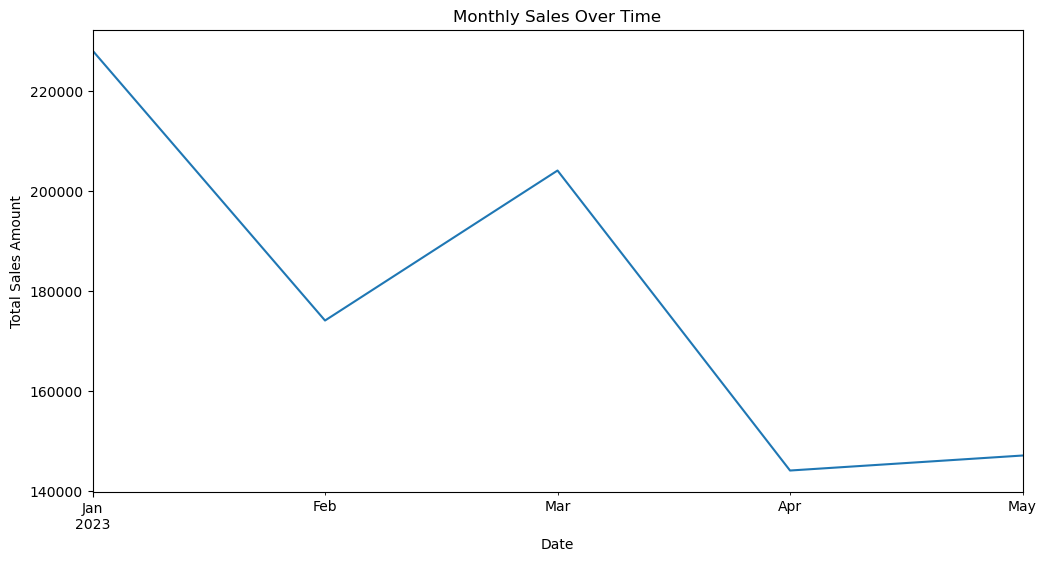

In [21]:
# Sales over time
df['SaleDate'] = pd.to_datetime(df['SaleDate'])
df.set_index('SaleDate', inplace=True)
monthly_sales = df.resample('M')['TotalAmount'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.show()